In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing: feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encoding
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

y_train_oh = one_hot(y_train, 3)

# Softmax function
def softmax(z):
    exp = np.exp(z - np.max(z, axis=1, keepdims=True))  # for stability
    return exp / np.sum(exp, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

# Logistic regression using gradient descent
def train(X, y, lr=0.1, epochs=300):
    m, n = X.shape
    k = y.shape[1]  # classes
    W = np.zeros((n, k))
    b = np.zeros((1, k))
    
    for _ in range(epochs):
        z = np.dot(X, W) + b
        y_pred = softmax(z)
        error = y_pred - y
        W -= lr * np.dot(X.T, error) / m
        b -= lr * np.sum(error, axis=0, keepdims=True) / m
    return W, b

# Prediction
def predict(X, W, b):
    return np.argmax(softmax(np.dot(X, W) + b), axis=1)

# Train model
W, b = train(X_train, y_train_oh)

# Predict
y_pred = predict(X_test, W, b)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


Accuracy: 0.9111111111111111


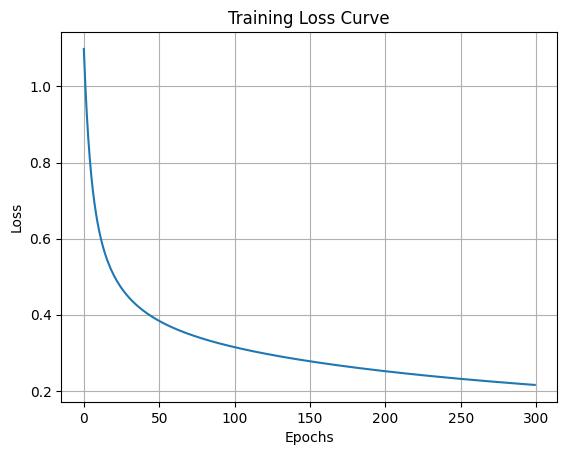

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
y_oh = np.eye(3)[y]
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.3, random_state=1)

def softmax(z): return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
def cross_entropy(y, p): return -np.mean(np.sum(y * np.log(p + 1e-8), axis=1))

W, b = np.zeros((4, 3)), np.zeros((1, 3))
losses = []
for _ in range(300):
    z = X_train @ W + b
    probs = softmax(z)
    losses.append(cross_entropy(y_train, probs))
    grad = probs - y_train
    W -= 0.1 * (X_train.T @ grad) / len(X_train)
    b -= 0.1 * np.sum(grad, axis=0, keepdims=True) / len(X_train)

preds = np.argmax(softmax(X_test @ W + b), axis=1)
true = np.argmax(y_test, axis=1)
print("Accuracy:", accuracy_score(true, preds))

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()
